# AI-Assisted Literature Screening: A Comparative Analysis of GPT and DeepSeek



Daniela Agostina Gonzalez

> *Departamento de Economía y Finanzas, Facultad de Ciencias Económicas, Universidad Nacional de Córdoba, Córdoba, Argentina.*





## Preparing Graphs

In [ ]:
import pandas as pd
import numpy as np
import openai
import os
import json
import os
import pickle

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load Results
df = pd.read_csv(".../deep_gpt_shuffle_df_dataset_Sep_2021.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,record_id,doi,title,abstract,label_included,gpt_labels,deep_labels
0,0,157,128,https://doi.org/10.1016/s0896-6273(02)00684-0,Reversible Inhibition of CREB/ATF Transcriptio...,CREB is critical for long-lasting synaptic and...,0,0,0
1,1,22,12,https://doi.org/10.1002/hipo.22095,Lateral entorhinal cortex is critical for nove...,Episodic memory incorporates information about...,1,1,1
2,2,5,115,https://doi.org/10.1016/j.freeradbiomed.2016.1...,Cisplatin-induced mitochondrial dysfunction is...,Chemotherapy-related cognitive impairment (CRC...,1,0,0
3,3,58,231,https://doi.org/10.1038/sj.npp.1301401,Arousal and Stress Effects on Consolidation an...,This study examined the effects of the arousal...,0,1,0
4,4,198,120,https://doi.org/10.3389/fnbeh.2012.00011,The endocannabinoid transport inhibitor AM404 ...,Cannabinoid compounds may influence both emoti...,0,0,0


In [ ]:
df['gpt_labels'].value_counts()

,count
gpt_labels,
0,120
1,116


In [ ]:
df['deep_labels'].value_counts()

,count
deep_labels,
0,194
1,42


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Metrics for GPT
y_true = df['label_included']
y_pred =  df['gpt_labels']

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label=1)
recall = recall_score(y_true, y_pred, pos_label=1)
f1 = f1_score(y_true, y_pred, pos_label=1)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Imprimir resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"Specificity: {specificity:.2f}")

#-------------------------------------------------------------------------------
# Metrics for DeepSeek
y_pred_d =  df['deep_labels']

cm_d = confusion_matrix(y_true, y_pred_d)
print("Confusion Matrix Deep:")
print(cm_d)

# Metrics
accuracy_d = accuracy_score(y_true, y_pred_d)
precision_d = precision_score(y_true, y_pred_d, pos_label=1)
recall_d = recall_score(y_true, y_pred_d, pos_label=1)
f1_d = f1_score(y_true, y_pred_d, pos_label=1)
tn_d, fp_d, fn_d, tp_d = cm_d.ravel()
specificity_d = tn_d / (tn_d + fp_d)

# Imprimir resultados
print(f"Accuracy Deep: {accuracy_d:.2f}")
print(f"Precision Deep: {precision_d:.2f}")
print(f"Recall Deep: {recall_d:.2f}")
print(f"F1-Score Deep: {f1_d:.2f}")
print(f"Specificity Deep: {specificity_d:.2f}")



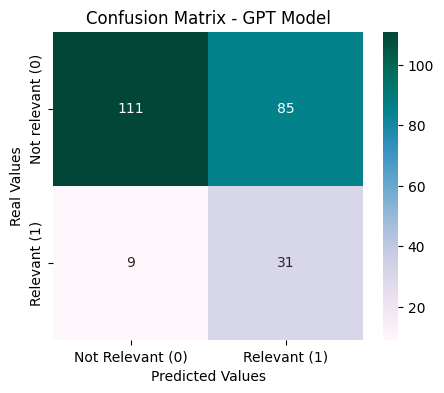

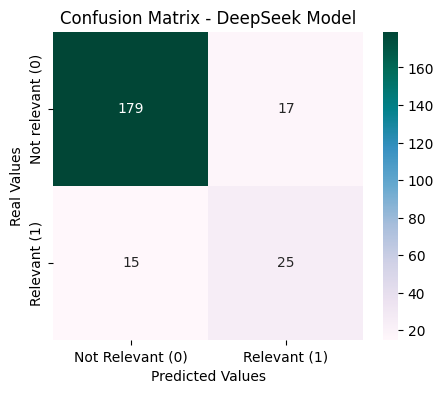

In [ ]:
# Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='PuBuGn',
            xticklabels=['Not Relevant (0)', 'Relevant (1)'],
            yticklabels=['Not relevant (0)', 'Relevant (1)'])
    plt.xlabel('Predicted Values')
    plt.ylabel('Real Values')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(df['label_included'], df['gpt_labels'], "GPT Model")
plot_confusion_matrix(df['label_included'], df['deep_labels'], "DeepSeek Model")




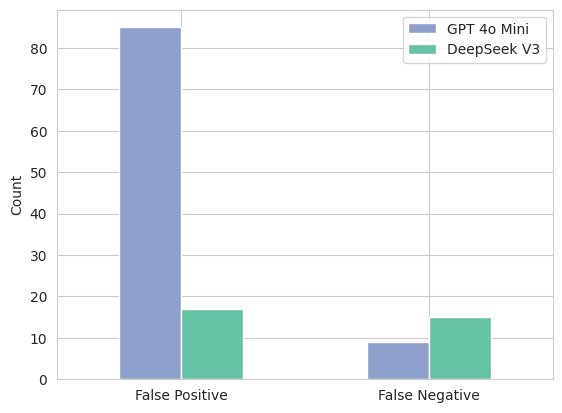

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Datos de errores
errors = {
    "GPT 4o Mini": [cm1[1], cm1[2]],  # FP, FN
    "DeepSeek V3": [cm2[1], cm2[2]]
}

df_errors = pd.DataFrame(errors, index=["False Positive", "False Negative"])

# Colores similares a "PuBuGn"
colors = ["#8DA0CB", "#66C2A5"]

df_errors.plot(kind="bar", color=colors)
plt.ylabel("Count")
#plt.title("Errores por Tipo en Cada Modelo")
plt.xticks(rotation=0)
plt.show()
